In [1]:
TRAILING_N=30
STATE="California"

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
32,application_1603244819567_0033,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
# Parameters
STATE = "California"


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Install required libraries

In [3]:
sc.install_pypi_package("pandas==0.25.1")
sc.install_pypi_package("requests==2.24.0")
sc.install_pypi_package("matplotlib==3.3.0") 
sc.install_pypi_package("numpy==1.19.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/7e/ab/ea76361f9d3e732e114adcd801d2820d5319c23d0ac5482fa3b412db217e/pandas-0.25.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/45/1e/0c169c6a5381e241ba7404532c16a21d86ab872c9bed8bdcd4c423954103/requests-2.24.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bc/a9/01ffebfb562e4274b6487b4bb1ddec7ca55ec7510b22e4c51f14098443b8/chardet-3.0.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a2/38/928ddce2273eaa564f6f50de919327bf3a00f091b5baba8dfa9460f3a8a8/idna-2.10-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/56/aa/4ef5aa67a9a62505db124a5cb5262332d1d4153462eb8fd89c9fa41e5d92/urllib3-1.25.11-py2.py3-none-any.whl
  Using cached https://files.pythonho

## Load data to pandas dataframe

In [4]:
import pandas as pd
import io
import requests
from datetime import datetime, timedelta

frames = []
dates = []

for delta in range(TRAILING_N, 0, -1):
    date = (datetime.today() - timedelta(delta)).strftime('%m-%d-%Y')
    dates.append(date)
    file_name = date + '.csv'

    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/' + file_name

    content=requests.get(url).content
    csv = io.StringIO(content.decode('utf-8'))
    tmp_frame = pd.read_csv(csv)
    frames.append(tmp_frame.loc[tmp_frame['Province_State'] == STATE])
    

merged_df=pd.concat(frames)
merged_df['Date'] = dates

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Plot Confirm cases

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

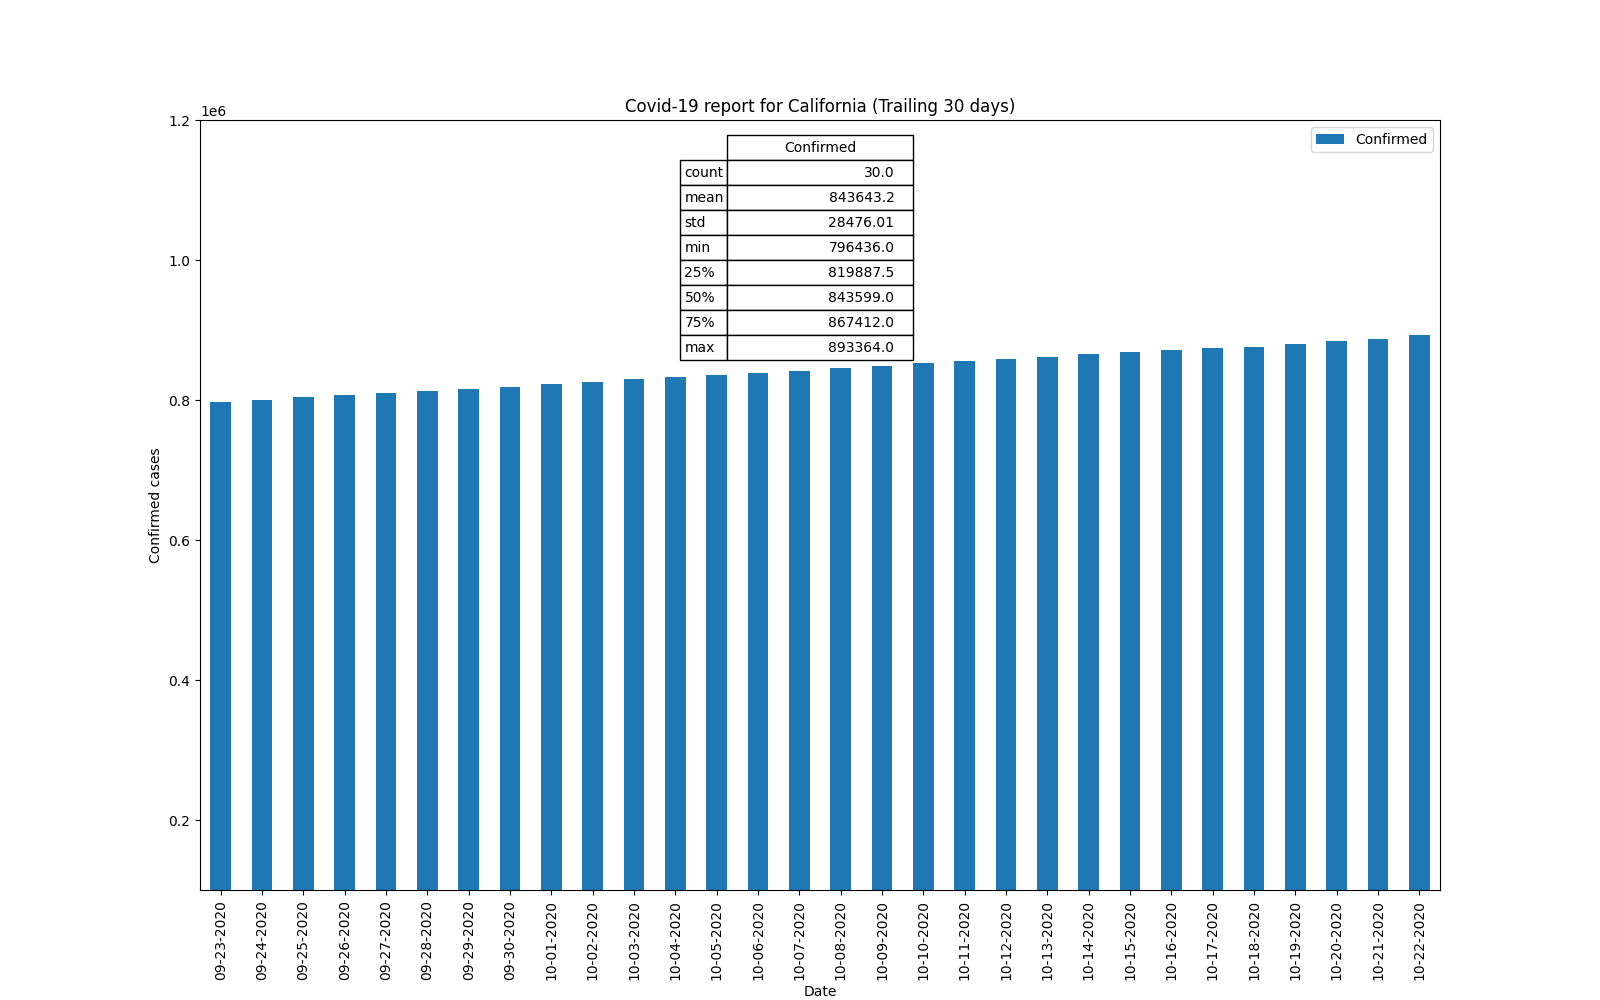

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import table


ax = merged_df.plot.bar(figsize=(16, 10), x='Date', y='Confirmed', legend=True)


table_confirmed = table(ax, np.round(merged_df['Confirmed'].describe(), 2), fontsize=12, loc='upper center', colWidths=[0.1, 0.1, 0.1])
table_confirmed.scale(1.5, 1.5)



ax.set_ylabel('Confirmed cases')
ax.set_ylim(100000, 1200000)



ax.set_title("Covid-19 report for {} (Trailing {} days)".format(STATE, TRAILING_N))

ax.legend(loc='upper right')


%matplot plt